# Mongabay Fire Tool

In this notebook we will perform all the data processing required for the [Fire tool](https://docs.google.com/document/d/1zpwxTejaSbb7tq3uFnwVx_fzysTMBZJvnJEhuDW4vAE/edit#).

For the fire alerts we will use the VIIRS alerts coming from GFW. 
[Here](https://www.globalforestwatch.org/dashboards/country/BRA/?category=fires&dashboardPrompts=eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJkb3dubG9hZERhc2hib2FyZFN0YXRzIiwiZGFzaGJvYXJkQW5hbHlzZXMiLCJ3aWRnZXRTZXR0aW5ncyIsInNoYXJlV2lkZ2V0Il0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyIsIndpZGdldFNldHRpbmdzIl0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyIsIndpZGdldFNldHRpbmdzIl0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyJdLCJzZXR0aW5ncyI6eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6W10sInNldHRpbmdzIjp7Im9wZW4iOmZhbHNlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5IjoiIn0sIm9wZW4iOnRydWUsInN0ZXBzS2V5IjoiZG93bmxvYWREYXNoYm9hcmRTdGF0cyJ9LCJvcGVuIjp0cnVlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5Ijoid2lkZ2V0U2V0dGluZ3MifSwic3RlcHNLZXkiOiJ3aWRnZXRTZXR0aW5ncyIsInN0ZXBJbmRleCI6LTEsImZvcmNlIjp0cnVlfSwib3BlbiI6dHJ1ZSwic3RlcEluZGV4IjowLCJzdGVwc0tleSI6InNoYXJlV2lkZ2V0In0sInN0ZXBzS2V5Ijoic2hhcmVXaWRnZXQiLCJmb3JjZSI6dHJ1ZX0%3D&fireAlertStats=eyJzdGFydEluZGV4IjowLCJlbmRJbmRleCI6NTEsInN0YXJ0RGF0ZUFic29sdXRlIjoiMjAyMC0xMS0zMCIsImVuZERhdGVBYnNvbHV0ZSI6IjIwMjEtMTEtMjIifQ%3D%3D&location=WyJjb3VudHJ5IiwiQlJBIl0%3D&map=eyJjZW50ZXIiOnsibGF0IjotMTUuMTI4MzAwNzgxNjIwNzUsImxuZyI6LTU0LjM5MDU3OTIxOTk5MjgxfSwiem9vbSI6My40OTg0NTEzMzAyNjUwNDUsImNhbkJvdW5kIjpmYWxzZSwiZGF0YXNldHMiOlt7ImRhdGFzZXQiOiJwb2xpdGljYWwtYm91bmRhcmllcyIsImxheWVycyI6WyJkaXNwdXRlZC1wb2xpdGljYWwtYm91bmRhcmllcyIsInBvbGl0aWNhbC1ib3VuZGFyaWVzIl0sImJvdW5kYXJ5Ijp0cnVlLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlfSx7ImRhdGFzZXQiOiJmaXJlLWFsZXJ0cy12aWlycyIsImxheWVycyI6WyJmaXJlLWFsZXJ0cy12aWlycyJdLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlLCJ0aW1lbGluZVBhcmFtcyI6eyJzdGFydERhdGVBYnNvbHV0ZSI6IjIwMjEtMDgtMjQiLCJlbmREYXRlQWJzb2x1dGUiOiIyMDIxLTExLTIyIiwic3RhcnREYXRlIjoiMjAyMS0wOC0yNCIsImVuZERhdGUiOiIyMDIxLTExLTIyIiwidHJpbUVuZERhdGUiOiIyMDIxLTExLTIyIn19XX0%3D&scrollTo=fireAlertStats&showMap=false&widget=fireAlertStats) an example of a chart with that data.

And here the endpoin to retrieve the data with a query example:

```
https://data-api.globalforestwatch.org/dataset/gadm__viirs__iso_weekly_alerts/v202105/query/json?sql=SELECT iso, alert__year, alert__week, SUM(alert__count) AS alert__count, confidence__cat FROM data WHERE iso = 'BRA' AND confidence__cat = 'h' and alert__year = 2021 GROUP BY iso, alert__year, alert__week, confidence__cat

```

For the precipitation data we will use the [CHIRPS Daily dataset from  GEE](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY#description). Notice that this dataset doesn’t cover the whole world.


The chart will include the following elements:
- moving average of weekly precipitation.
- long-term average of weekly precipitation.
- Cumulative fire alerts
- long-term average of cumulative fire alerts.

The scope of the geographical data should be national (iso) or regional (adm1). 


# Setup
## Library import
We import all the required Python libraries

In [1]:
import os
import ee
import wxee
import geemap
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely.wkb 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray_leaflet
import ipyleaflet as ipyl
import json
import requests
import math
from datetime import timedelta

ee.Initialize()

# Data import
## [CHIRPS Daily dataset from  GEE](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY#description)
**Automated conversion from Earth Engine JavaScripts to Python scripts**

In [ ]:
js_dir = '/home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing'
geemap.conversion.js_to_python_dir(in_dir=js_dir, out_dir=js_dir, use_qgis=True)
print("Python scripts saved at: {}".format(js_dir))

### Read data from GEE

**Get list of countries that entirely fall inside the `CHIRPS` dataset**

In [47]:
query =(f"SELECT iso, name_0 FROM gadm36_countries")
left = -180
bottom = -50.5
query =(f"SELECT iso, name_0 FROM gadm36_countries WHERE ST_Contains(ST_MakeEnvelope(\'-180\', \'-50.5\', 180, 50.5, 4326), the_geom)")

url = f"https://api.resourcewatch.org/v1/query/Political-boundaries-GADM-36"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')

df_country = pd.DataFrame.from_dict(pd.json_normalize(data))

df_country

,iso,name_0
0,NFK,Norfolk Island
1,JEY,Jersey
2,KWT,Kuwait
3,BFA,Burkina Faso
4,BGD,Bangladesh
...,...,...
211,XNC,Northern Cyprus
212,YEM,Yemen
213,ZAF,South Africa
214,ZMB,Zambia


**Get list of admin1 regions for a given country**

In [48]:
iso = 'BRA'

query =(f"SELECT iso, name_1, gid_1 FROM gadm36_adm1 WHERE iso=\'{iso}\'"
)

url = f"https://api.resourcewatch.org/v1/query/Political-boundaries-Admin-1-level-GADM-36"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_region = pd.DataFrame.from_dict(pd.json_normalize(data))
df_region['code'] = df_region['gid_1'].apply(lambda x: x.split('.')[1].split('_')[0])
df_region

,iso,name_1,gid_1,code
0,BRA,Acre,BRA.1_1,1
1,BRA,Mato Grosso do Sul,BRA.11_1,11
2,BRA,Mato Grosso,BRA.12_1,12
3,BRA,Rio Grande do Norte,BRA.20_1,20
4,BRA,Minas Gerais,BRA.13_1,13
5,BRA,Pará,BRA.14_1,14
6,BRA,Maranhão,BRA.10_1,10
7,BRA,Paraíba,BRA.15_1,15
8,BRA,Tocantins,BRA.27_1,27
9,BRA,Roraima,BRA.23_1,23


**Get geometries from gadm36_1**

In [20]:
gadm36_1 = gpd.read_file('../data/gadm36/gadm36_1.shp')

In [21]:
gadm36_1_GeoJson = json.loads(gadm36_1[gadm36_1['NAME_0'] == 'Brazil'].to_json())

**Get geometry from geostore**

In [2]:
iso = 'BRA'
code = ''#22

url = f'https://api.resourcewatch.org/v2/geostore/admin/{iso}/{code}'

r = requests.get(url)
geometry = r.json().get('data').get('attributes').get('geojson')

aoi = ee.Geometry(geometry.get('features')[0].get('geometry'))

**Define dates**

In [4]:
date = pd.to_datetime('2021/10/10')
today = pd.to_datetime('today').normalize()

#date = None

if date:
    date = date
else:
    date = today

#nDays_year = pd.Period(today, freq='D').day_of_year
nDays_year =  len(pd.date_range(date.replace(month=1, day=1) , date.replace(month=12, day=31) ,freq='D'))
start_year_date = date - timedelta(days=nDays_year)
start_date = date - timedelta(days=nDays_year+61)
dates = pd.date_range(start_date, date,freq='D').astype(str)

**Breaks geometry into a grid**

In [53]:
# Script takes an arbitrary feature and breaks it into and n by n equal-area grid. 
# The grid is then clipped against the original geometry.

# Returns a featureCollection of Grids
 
# 'Based on code from':

# '- https':#gis.stackexchange.com/questions/231959/draw-a-grid-of-polygons-in-google-earth-engine
# '- https':#gis.stackexchange.com/questions/318959/get-lon-lat-of-a-top-left-corner-for-geometry-in-google-earth-engine/318983

#


# Function takes a feature and a grid dimension, n
def getClippedGrid(feat, n):

    # Get features bounds
    bounds = feat.bounds().geometry().bounds()

    # Get a list of coordinates
    listCoords = ee.Array.cat(bounds.coordinates(), 1)
    #print('Coords: ', listCoords)

    # get the x and y-coordinates as lists
    xCoords = listCoords.slice(1, 0, 1)
    yCoords = listCoords.slice(1, 1, 2)

    # reduce the arrays to find the max (or min) value (edges of grid)
    lon_start = xCoords.reduce('min', [0]).get([0,0]).getInfo(); print('xMin',lon_start)
    lon_end = xCoords.reduce('max', [0]).get([0,0]).getInfo(); print('xMax',lon_end)
    lat_start = yCoords.reduce('min', [0]).get([0,0]).getInfo(); print('yMin',lat_start)
    lat_end = yCoords.reduce('max', [0]).get([0,0]).getInfo(); print('yMax',lat_end)

    # and hence the number of grid cells
    num_cells = n*n
    lon_edge = (lon_end-lon_start)/math.sqrt(num_cells)
    lat_edge = (lat_end-lat_start)/math.sqrt(num_cells)
    #print('lon_edge',lon_edge)
    #print('lat_edge',lat_edge)

    # Create the grid bu adding each cell as a feature to a list
    polys = []
    cell_id = 0
    for lon in np.arange(lon_start, lon_end, lon_edge):
        x1 = lon
        x2 = lon + lon_edge
        for lat in np.arange(lat_start, lat_end, lat_edge):
            cell_id = cell_id + 1
            y1 = lat
            y2 = lat + lat_edge

            # label each grid for reference
            polys.append(ee.Feature(ee.Geometry.Rectangle(x1, y1, x2, y2), {'label': cell_id}))


    grid = ee.FeatureCollection(polys)

    # Crop the grid to orignial shape
    def func_woo(feature):

        feature = ee.Feature(feature)

        intersection = feature.intersection(feat, ee.ErrorMargin(1))
        return ee.Feature(intersection).set({'area': intersection.area().divide(1000 * 1000)})

    polyIntersect = grid.map(func_woo)
    return polyIntersect

In [54]:
# Create or Import a geometry (called geometry) and cast as a ee.Feature
feature = ee.Feature(aoi, {})

# Decide no. of (in this case: equally sized) cells across
n = 20

# Get grid
clipped_grid = getClippedGrid(feature, n)

Map = geemap.Map(center=(-20, -45), zoom=4)
Map.addLayer(feature, {'color': 'red'}, 'Original shape')
Map.addLayer(clipped_grid, {'color': 'blue', 'strokeWidth': 1}, 'Clipped grid', False)
Map

xMin -66.80650000000001
xMax -59.774300000000004
yMin -13.557600000000026
yMax -7.969299999999976


Map(center=[-20, -45], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [44]:
feature = ee.Feature(aoi, {})

# Decide no. of (in this case: equally sized) cells across
n = 20

# Get grid
#clipped_grid = getClippedGrid(feature, n)

In [55]:
feat = feature

# Get features bounds
bounds = feat.bounds().geometry().bounds()

# Get a list of coordinates
listCoords = ee.Array.cat(bounds.coordinates(), 1)
#print('Coords: ', listCoords)

# get the x and y-coordinates as lists
xCoords = listCoords.slice(1, 0, 1)
yCoords = listCoords.slice(1, 1, 2)

# reduce the arrays to find the max (or min) value (edges of grid)
lon_start = xCoords.reduce('min', [0]).get([0,0]).getInfo(); print('xMin',lon_start)
lon_end = xCoords.reduce('max', [0]).get([0,0]).getInfo(); print('xMax',lon_end)
lat_start = yCoords.reduce('min', [0]).get([0,0]).getInfo(); print('yMin',lat_start)
lat_end = yCoords.reduce('max', [0]).get([0,0]).getInfo(); print('yMax',lat_end)

# and hence the number of grid cells
num_cells = n*n
lon_edge = (lon_end-lon_start)/math.sqrt(num_cells)
lat_edge = (lat_end-lat_start)/math.sqrt(num_cells)
#print('lon_edge',lon_edge)
#print('lat_edge',lat_edge)

# Create the grid bu adding each cell as a feature to a list
polys = []
cell_id = 0
for lon in np.arange(lon_start, lon_end, lon_edge):
    x1 = lon
    x2 = lon + lon_edge
    for lat in np.arange(lat_start, lat_end, lat_edge):
        cell_id = cell_id + 1
        y1 = lat
        y2 = lat + lat_edge

        # label each grid for reference
        polys.append(ee.Feature(ee.Geometry.Rectangle(x1, y1, x2, y2), {'label': cell_id}))


grid = ee.FeatureCollection(polys)

# Crop the grid to orignial shape
def func_woo(feature):

    feature = ee.Feature(feature)

    intersection = feature.intersection(feat, ee.ErrorMargin(1))
    return ee.Feature(intersection).set({'area': intersection.area().divide(1000 * 1000)})

polyIntersect = grid.map(func_woo)

xMin -66.80650000000001
xMax -59.774300000000004
yMin -13.557600000000026
yMax -7.969299999999976


In [56]:
grid.getInfo()

{'type': 'FeatureCollection',
 'columns': {'label': 'Integer', 'system:index': 'String'},
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-66.80650000000001, -13.557600000000026],
      [-66.45489000000002, -13.557600000000026],
      [-66.45489000000002, -13.278185000000024],
      [-66.80650000000001, -13.278185000000024],
      [-66.80650000000001, -13.557600000000026]]]},
   'id': '0',
   'properties': {'label': 1}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-66.80650000000001, -13.278185000000024],
      [-66.45489000000002, -13.278185000000024],
      [-66.45489000000002, -12.998770000000022],
      [-66.80650000000001, -12.998770000000022],
      [-66.80650000000001, -13.278185000000024]]]},
   'id': '1',
   'properties': {'label': 2}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-66.80650000000001, -12.998770000000022],
      [-66.45489000000002, -12.99877000000002

In [57]:
polyIntersect.getInfo()

{'type': 'FeatureCollection',
 'columns': {'area': 'Number', 'label': 'Integer', 'system:index': 'String'},
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPoint', 'coordinates': []},
   'id': '0',
   'properties': {'area': 0, 'label': 1}},
  {'type': 'Feature',
   'geometry': {'type': 'MultiPoint', 'coordinates': []},
   'id': '1',
   'properties': {'area': 0, 'label': 2}},
  {'type': 'Feature',
   'geometry': {'type': 'MultiPoint', 'coordinates': []},
   'id': '2',
   'properties': {'area': 0, 'label': 3}},
  {'type': 'Feature',
   'geometry': {'type': 'MultiPoint', 'coordinates': []},
   'id': '3',
   'properties': {'area': 0, 'label': 4}},
  {'type': 'Feature',
   'geometry': {'type': 'MultiPoint', 'coordinates': []},
   'id': '4',
   'properties': {'area': 0, 'label': 5}},
  {'type': 'Feature',
   'geometry': {'type': 'MultiPoint', 'coordinates': []},
   'id': '5',
   'properties': {'area': 0, 'label': 6}},
  {'type': 'Feature',
   'geometry': {'type': 'MultiPoint'

**Read ImageCollection**

In [5]:
dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
                  .filter(ee.Filter.date(start_date.strftime('%Y-%m-%d'), (date + timedelta(days=1)).strftime('%Y-%m-%d'))).filterBounds(aoi)

chirps = dataset.select('precipitation')

# Clip images with AoI
def func_vee(image):
    return image.clip(aoi)

#chirps = chirps.map(func_vee)

chirpsVis = {
    'min': 1.0,
    'max': 100.0,
    'palette': ['001137', '0aab1e', 'e7eb05', 'ff4a2d', 'e90000'],
  }

#image = chirps.limit(1, 'system:time_start', False).first()

Map = geemap.Map(center=(-20, -45), zoom=4)
Map.addLayer(chirps, chirpsVis, 'Precipitation')
Map.addLayer(ee.Feature(aoi, {}), {'color': 'red'}, 'Original shape')
Map

Map(center=[-20, -45], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

### Data analysis with `xarray`
**Convert the `ee.ImageCollection` to `xarray.DataArray` with [wxee](https://github.com/aazuspan/wxee)**

In [ ]:
da = chirps.wx.to_xarray(scale=5566)
da

**Display data with `matplotlib`**

In [ ]:
fig, ax = plt.subplots(figsize=(15,7.5))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_global()

da['precipitation'].isel(time=-1).plot.pcolormesh(ax=ax, cmap='magma', transform=ccrs.PlateCarree(), x='x', y='y', add_colorbar=True)
ax.coastlines()

lon_min, lat_min, lon_max, lat_max = (-74, -34, -34, 5)
ax.set_ylim([lat_min-1,lat_max+1]);
ax.set_xlim([lon_min-1,lon_max+1]);

**Display data with `ipyleafle`**

In [ ]:
import rioxarray
m = ipyl.Map()
l = da['precipitation'].isel(time=-1).leaflet.plot(m)
m.add_layer(l)
m

**Compute mean value over time**

In [ ]:
mean_values = da['precipitation'].sum(['x', 'y']).values

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
da['precipitation'].sum(['x', 'y']).plot(ax=ax)

### Data analysis with `GEE`
**Get mean values over time**

Calling reduceRegions() with a very large or complex FeatureCollection as input may result in the dreaded "Computed value is too large" error. To prevent this issue here we will map reduceRegion() over the FeatureCollection instead as is suggested [here](https://developers.google.com/earth-engine/guides/best_practices#reduceregion-vs.-reduceregions-vs.-for-loop). 

In [6]:
def nestedMappedReducer(featureCol, imageCol):
    def mapReducerOverImgCol(feature):
        def imgReducer(image):
            return ee.Feature(feature.geometry().centroid(100),
                image.reduceRegion(
                    geometry = feature.geometry(),
                    reducer = ee.Reducer.mean(),
                    tileScale = 10,
                    maxPixels = 1e+13,
                    bestEffort = True 
                )).set({'date': image.date().format("YYYY-MM-dd")}).copyProperties(feature)

        return imageCol.map(imgReducer)

    return featureCol.map(mapReducerOverImgCol).flatten()

**For all admin1 regions**

In [33]:
count = chirps.size()
data = nestedMappedReducer(ee.FeatureCollection(gadm36_1_GeoJson.get('features')), chirps).toList(count.getInfo()*len(gadm36_1_GeoJson.get('features'))).getInfo()
df_pre_provinces = pd.DataFrame(map(lambda x: x.get('properties'), data))

In [34]:
df_pre_provinces

,ENGTYPE_1,GID_0,GID_1,HASC_1,NAME_0,NAME_1,TYPE_1,date,precipitation,VARNAME_1
0,State,BRA,BRA.1_1,BR.AC,Brazil,Acre,Estado,2020-10-31,11.288073,NaN
1,State,BRA,BRA.1_1,BR.AC,Brazil,Acre,Estado,2020-11-01,0.077326,NaN
2,State,BRA,BRA.1_1,BR.AC,Brazil,Acre,Estado,2020-11-02,0.004394,NaN
3,State,BRA,BRA.1_1,BR.AC,Brazil,Acre,Estado,2020-11-03,0.003099,NaN
4,State,BRA,BRA.1_1,BR.AC,Brazil,Acre,Estado,2020-11-04,0.104544,NaN
...,...,...,...,...,...,...,...,...,...,...
9877,State,BRA,BRA.27_1,BR.TO,Brazil,Tocantins,Estado,2021-10-27,4.088928,NaN
9878,State,BRA,BRA.27_1,BR.TO,Brazil,Tocantins,Estado,2021-10-28,1.726734,NaN
9879,State,BRA,BRA.27_1,BR.TO,Brazil,Tocantins,Estado,2021-10-29,1.899471,NaN
9880,State,BRA,BRA.27_1,BR.TO,Brazil,Tocantins,Estado,2021-10-30,7.989234,NaN


**For a single region**

In [7]:
count = chirps.size()
data = nestedMappedReducer(ee.FeatureCollection(geometry.get('features')), chirps).toList(count).getInfo()

In [8]:
df_pre = pd.DataFrame(map(lambda x: x.get('properties'), data))
df_pre

,date,precipitation
0,2020-08-10,0.665233
1,2020-08-11,1.230767
2,2020-08-12,2.845096
3,2020-08-13,2.064662
4,2020-08-14,1.362297
...,...,...
422,2021-10-06,2.775388
423,2021-10-07,3.899227
424,2021-10-08,2.939544
425,2021-10-09,3.572401


**Moving averages**

In [9]:
# 1 week moving average
df_pre['precipitation_w'] = df_pre[['date', 'precipitation']].rolling(window=7, center=True).mean()
# 2 month moving average
df_pre['precipitation_2m'] = df_pre[['date', 'precipitation']].rolling(window=61, center=True).mean()
# take current year days
df_pre = df_pre[(df_pre['date'] >= start_year_date.strftime('%Y-%m-%d')) & (df_pre['date'] <= date.strftime('%Y-%m-%d'))]

<AxesSubplot:xlabel='date'>

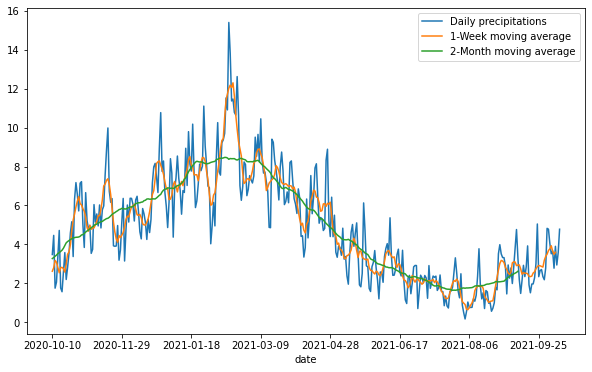

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
df_pre.plot(ax=ax, x='date', y='precipitation', label = 'Daily precipitations')
df_pre.plot(ax=ax, x='date', y='precipitation_w' , label = '1-Week moving average')
df_pre.plot(ax=ax, x='date', y='precipitation_2m', label = '2-Month moving average')

##  VIIRS fire alerts

### **Daily alerts**

### National (iso)

In [22]:
iso = 'BRA'
confidence = 'h' #'n', 'l'

query =(f"SELECT alert__date, SUM(alert__count) AS alert__count \
        FROM data WHERE iso = \'{iso}\' AND confidence__cat = \'{confidence}\' AND alert__date >= \'{start_date}\' AND alert__date <= \'{date}\' \
        GROUP BY iso, alert__date, confidence__cat \
        ORDER BY alert__date"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__adm2_daily_alerts/latest/query/json"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire = pd.DataFrame.from_dict(pd.json_normalize(data))
# Fill missing dates with 0
df_fire = df_fire.set_index('alert__date').reindex(dates, fill_value=0).reset_index().rename(columns={'index': 'alert__date'})
df_fire.head()

,alert__date,alert__count
0,2020-08-10,0
1,2020-08-11,700
2,2020-08-12,670
3,2020-08-13,652
4,2020-08-14,1235


In [16]:
r.url

'https://data-api.globalforestwatch.org/dataset/gadm__viirs__iso_daily_alerts/latest/query/json?sql=SELECT+alert__date%2C+SUM%28alert__count%29+AS+alert__count+++++++++FROM+data+WHERE+iso+%3D+%27BRA%27+AND+confidence__cat+%3D+%27h%27+AND+alert__date+%3E%3D+%272020-08-10+00%3A00%3A00%27+AND+alert__date+%3C%3D+%272021-10-10+00%3A00%3A00%27+++++++++GROUP+BY+iso%2C+alert__date%2C+confidence__cat+++++++++ORDER+BY+alert__date'

**Moving averages**

In [ ]:
# 1 week moving average
df_fire['alert__count_w'] = df_fire[['alert__date', 'alert__count']].rolling(window=7, center=True).mean()
# 2 month moving average
df_fire['alert__count_2m'] = df_fire[['alert__date', 'alert__count']].rolling(window=61, center=True).mean()
# take current year days
df_fire = df_fire[(df_fire['alert__date'] >= start_year_date.strftime('%Y-%m-%d')) & (df_fire['alert__date'] <= today.strftime('%Y-%m-%d'))]

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count', label = 'Daily fire alerts')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_w' , label = '1-Week moving average')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_2m', label = '2-Month moving average')

**Cumulative fire alerts**

In [ ]:
df_fire['alert__count_cumsum'] = df_fire[['alert__count']].cumsum()
df_fire['alert__count_cumsum_w'] = df_fire[['alert__count_w']].cumsum()
df_fire['alert__count_cumsum_2m'] = df_fire[['alert__count_2m']].cumsum()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count_cumsum', label = 'Daily fire alerts')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_cumsum_w' , label = '1-Week moving average')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_cumsum_2m', label = '2-Month moving average')

### Regional (admin1)

In [57]:
iso = 'BRA'
adm1 = 22
confidence = 'h' #'n', 'l'

query =(f"SELECT alert__date, SUM(alert__count) AS alert__count \
        FROM data WHERE iso = \'{iso}\' AND adm1::integer = {adm1} AND confidence__cat = \'{confidence}\' AND alert__date >= \'{start_date}\' AND alert__date <= \'{date}\' \
        GROUP BY iso, adm1, alert__date, confidence__cat \
        ORDER BY alert__date"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__adm2_daily_alerts/latest/query/json"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire = pd.DataFrame.from_dict(pd.json_normalize(data))
# Fill missing dates with 0
df_fire = df_fire.set_index('alert__date').reindex(dates, fill_value=0).reset_index().rename(columns={'index': 'alert__date'})
df_fire.head()

,alert__date,alert__count
0,2020-10-15,0
1,2020-10-16,41
2,2020-10-17,18
3,2020-10-18,19
4,2020-10-19,1


**Moving averages**

In [58]:
# 1 week moving average
df_fire['alert__count_w'] = df_fire[['alert__date', 'alert__count']].rolling(window=7, center=True).mean()
# 2 month moving average
df_fire['alert__count_2m'] = df_fire[['alert__date', 'alert__count']].rolling(window=61, center=True).mean()
# take current year days
df_fire = df_fire[(df_fire['alert__date'] >= start_year_date.strftime('%Y-%m-%d')) & (df_fire['alert__date'] <= date.strftime('%Y-%m-%d'))]

<AxesSubplot:xlabel='alert__date'>

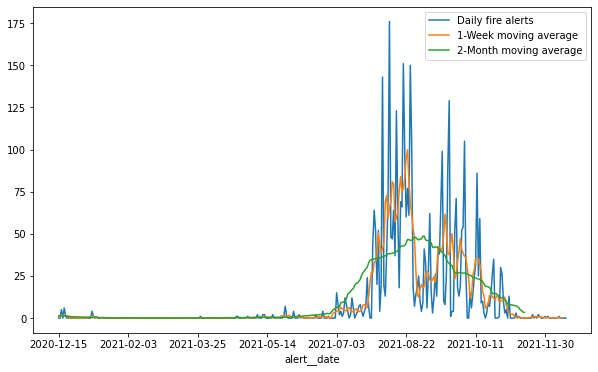

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count', label = 'Daily fire alerts')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_w' , label = '1-Week moving average')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_2m', label = '2-Month moving average')

### Regional (admin2)

In [ ]:
iso = 'BRA'
adm1 = 22
adm2 = 6
confidence = 'h' #'n', 'l'

query =(f"SELECT alert__date, SUM(alert__count) AS alert__count \
        FROM data WHERE iso = \'{iso}\' AND adm1::integer = {adm1} AND adm2::integer = {adm2} AND confidence__cat = \'{confidence}\' AND alert__date >= \'{start_date}\' AND alert__date <= \'{today}\' \
        GROUP BY iso, adm1, adm2, alert__date, confidence__cat \
        ORDER BY alert__date"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__adm2_daily_alerts/latest/query/json"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire = pd.DataFrame.from_dict(pd.json_normalize(data))
# Fill missing dates with 0
df_fire = df_fire.set_index('alert__date').reindex(dates, fill_value=0).reset_index().rename(columns={'index': 'alert__date'})
df_fire.head()

**Moving averages**

In [ ]:
# 1 week moving average
df_fire['alert__count_w'] = df_fire[['alert__date', 'alert__count']].rolling(window=7, center=True).mean()
# 2 month moving average
df_fire['alert__count_2m'] = df_fire[['alert__date', 'alert__count']].rolling(window=61, center=True).mean()
# take current year days
df_fire = df_fire[(df_fire['alert__date'] >= start_year_date.strftime('%Y-%m-%d')) & (df_fire['alert__date'] <= today.strftime('%Y-%m-%d'))]

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count', label = 'Daily fire alerts')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_w' , label = '1-Week moving average')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_2m', label = '2-Month moving average')

##  Final widget examples

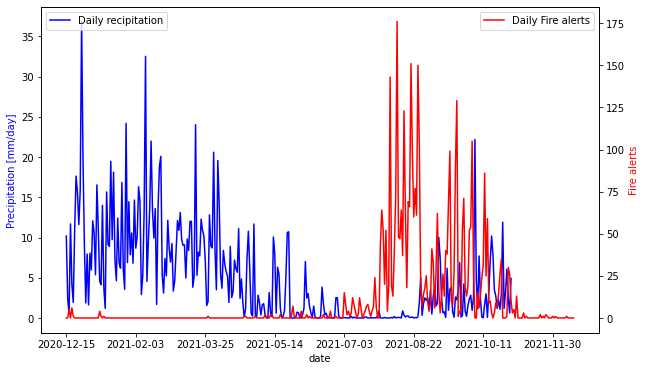

In [60]:
fig, ax = plt.subplots(figsize=(10,6))

ax2 = ax.twinx()
df_pre.plot(ax=ax, x='date', y='precipitation', color='b', label='Daily recipitation', legend=True)
df_fire.plot(ax=ax2, x='alert__date', y='alert__count', color='r', label='Daily Fire alerts', legend=True)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('Precipitation [mm/day]', color='b')
ax2.set_ylabel('Fire alerts', color='r')

plt.show()

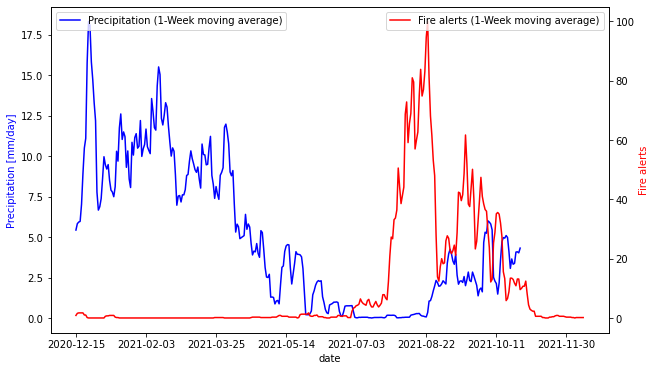

In [61]:
fig, ax = plt.subplots(figsize=(10,6))

ax2 = ax.twinx()
df_pre.plot(ax=ax, x='date', y='precipitation_w', color='b', label='Precipitation (1-Week moving average)', legend=True)
df_fire.plot(ax=ax2, x='alert__date', y='alert__count_w', color='r', label='Fire alerts (1-Week moving average)', legend=True)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('Precipitation [mm/day]', color='b')
ax2.set_ylabel('Fire alerts', color='r')

plt.show()

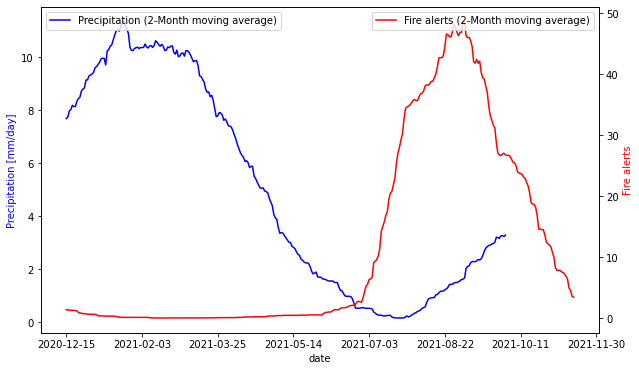

In [62]:
fig, ax = plt.subplots(figsize=(10,6))

ax2 = ax.twinx()
df_pre.plot(ax=ax, x='date', y='precipitation_2m', color='b', label='Precipitation (2-Month moving average)', legend=True)
df_fire.plot(ax=ax2, x='alert__date', y='alert__count_2m', color='r', label='Fire alerts (2-Month moving average)', legend=True)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('Precipitation [mm/day]', color='b')
ax2.set_ylabel('Fire alerts', color='r')

plt.show()

**Organize data**

In [79]:
json.loads(pd.merge(df_fire.rename(columns={'alert__date': 'date'}), df_pre, how='left', on='date').to_json(orient='records'))

[{'date': '2020-12-15',
  'alert__count': 0,
  'alert__count_w': 0.8571428571,
  'alert__count_2m': 1.3770491803,
  'precipitation': 10.1866959083,
  'precipitation_w': 5.4375543381,
  'precipitation_2m': 7.6856272875},
 {'date': '2020-12-16',
  'alert__count': 0,
  'alert__count_w': 1.5714285714,
  'alert__count_2m': 1.2950819672,
  'precipitation': 2.415980535,
  'precipitation_w': 5.8327093163,
  'precipitation_2m': 7.7424542715},
 {'date': '2020-12-17',
  'alert__count': 5,
  'alert__count_w': 1.7142857143,
  'alert__count_2m': 1.2950819672,
  'precipitation': 0.5291816012,
  'precipitation_w': 5.9314319574,
  'precipitation_2m': 7.9776032275},
 {'date': '2020-12-18',
  'alert__count': 0,
  'alert__count_w': 1.7142857143,
  'alert__count_2m': 1.2786885246,
  'precipitation': 11.6948741472,
  'precipitation_w': 5.9733591108,
  'precipitation_2m': 8.0255773907},
 {'date': '2020-12-19',
  'alert__count': 6,
  'alert__count_w': 1.7142857143,
  'alert__count_2m': 1.262295082,
  'precipi

## **Historical data**

In [ ]:
years = np.repeat(np.arange(2012, 2022, 1), 52)
weeks = np.tile(np.arange(1, 53, 1), 10)
hist_dates = years*100 + weeks
hist_days = pd.to_datetime(pd.DataFrame({'date': hist_dates})['date'].astype(str) + '1', format='%Y%W%w')

###  **VIIRS fire alerts**
### National (iso)

In [ ]:
iso = 'BRA'
confidence = 'h' #'n', 'l'

query =(f"SELECT iso, alert__year, alert__week, SUM(alert__count) AS alert__count, confidence__cat \
        FROM data WHERE iso = \'{iso}\' AND confidence__cat = \'{confidence}\' \
        GROUP BY iso, alert__year, alert__week, confidence__cat"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__iso_weekly_alerts/latest/query"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire_hist = pd.DataFrame.from_dict(json_normalize(data))
df_fire_hist.sort_values(by=['alert__year', 'alert__week'], inplace=True)
#Add dates
dates = df_fire_hist['alert__year']*100+ df_fire_hist['alert__week']
df_fire_hist['alert__date'] = pd.to_datetime(dates.astype(str) + '1', format='%Y%W%w')

# Fill missing dates with 0
df_fire_hist = df_fire_hist[['alert__date', 'alert__count']]
df_fire_hist = df_fire_hist[(df_fire_hist['alert__date'] >= hist_days.iloc[0]) & (df_fire_hist['alert__date'] <= hist_days.iloc[-1])]
df_fire_hist = df_fire_hist.drop_duplicates('alert__date')
df_fire_hist = df_fire_hist.set_index('alert__date').reindex(hist_days, fill_value=0).reset_index()
df_fire_hist['date'] = df_fire_hist['date'].apply(lambda x: x.strftime('%Y-%m-%d'))

df_fire_hist.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire_hist.plot(ax=ax, x='date', y='alert__count', color='r', label='Weekly fire alerts')

### Regional (admin1)

In [ ]:
iso = 'BRA'
adm1 = 22
confidence = 'h' #'n', 'l'

query =(f"SELECT alert__year, alert__week, SUM(alert__count) AS alert__count, confidence__cat \
        FROM data WHERE iso = \'{iso}\' AND adm1::integer = {adm1} AND confidence__cat = \'{confidence}\' \
        GROUP BY alert__year, alert__week, confidence__cat"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__adm1_weekly_alerts/latest/query"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire_hist = pd.DataFrame.from_dict(json_normalize(data))
df_fire_hist.sort_values(by=['alert__year', 'alert__week'], inplace=True)
#Add dates
dates = df_fire_hist['alert__year']*100+ df_fire_hist['alert__week']
df_fire_hist['alert__date'] = pd.to_datetime(dates.astype(str) + '1', format='%Y%W%w')

# Fill missing dates with 0
df_fire_hist = df_fire_hist[['alert__date', 'alert__count']]
df_fire_hist = df_fire_hist[(df_fire_hist['alert__date'] >= hist_days.iloc[0]) & (df_fire_hist['alert__date'] <= hist_days.iloc[-1])]
df_fire_hist = df_fire_hist.drop_duplicates('alert__date')
df_fire_hist = df_fire_hist.set_index('alert__date').reindex(hist_days, fill_value=0).reset_index()
df_fire_hist['date'] = df_fire_hist['date'].apply(lambda x: x.strftime('%Y-%m-%d'))

df_fire_hist.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire_hist.plot(ax=ax, x='date', y='alert__count', color='r', label='Weekly fire alerts')

### **CHIRPS Daily precipitation data**

In [ ]:
dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
                  .filter(ee.Filter.date('2012-01-01', '2021-12-31')).filterBounds(aoi)

chirps_hist = dataset.select('precipitation')

In [ ]:
count = chirps_hist.size()
data = nestedMappedReducer(ee.FeatureCollection(geometry.get('features')), chirps_hist).toList(count).getInfo()

In [ ]:
df_pre_hist = pd.DataFrame(map(lambda x: x.get('properties'), data))
# 1 week moving average
df_pre_hist['precipitation_w'] = df_pre_hist[['date', 'precipitation']].rolling(window=7, center=True).sum()
# take historic year days
df_pre_hist = df_pre_hist[df_pre_hist['date'].isin(list(hist_days.apply(lambda x: x.strftime('%Y-%m-%d'))))]
# Fill missing dates with 0
df_pre_hist = df_pre_hist.set_index('date').reindex(list(hist_days.apply(lambda x: x.strftime('%Y-%m-%d'))), fill_value=0).reset_index()
df_pre_hist

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df_pre_hist.plot(ax=ax, x='date', y='precipitation_w', color='b', label='Weekly precipitation')

####  **Final widget example**

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax2 = ax.twinx()
df_pre_hist.plot(ax=ax, x='date', y='precipitation_w', color='b', label='Weekly precipitation', legend=True)
df_fire_hist.plot(ax=ax2, x='date', y='alert__count', color='r', label='Weekly fire alerts', legend=True)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('Precipitation [mm/week]', color='b')
ax2.set_ylabel('Fire alerts', color='r')
